# Unstructured method

In [1]:
#Libraries used
from unstructured.partition.pdf import partition_pdf # For conversion of PDF into elements .
from langchain_core.documents import Document # For converting elements into Document .
from pathlib import Path # For Loading the directory or PDF path .
from typing import List
import traceback # Used for error handling .

In [2]:
# Function to load all the PDF's from Directory .
def loading_pdf(dir_path:str='../data/pdf')->List[Document]: # Return type .
    dir_path=Path(dir_path) # Loading directory Path

    if not dir_path.is_dir(): # Checking if the directory is valid .
        raise NotADirectoryError(f"{dir_path} is a invalid directory .")

    print(f"The directory path is : {dir_path} .")
    docs=list(dir_path.rglob("*.pdf")) # Storing all the PDF's path into list .
    print(f"Number of PDF's in directory is {len(docs)}")

    if len(docs)==0: # Checking if any PDFs exists in the directory .
        print('No documents in the dir_path')
        return []

    # All these variables used for stats check at the end .
    all_pdf_size=0.0
    all_elements=[]
    all_documents=[]
    failed_pdf=[]

    print("="*20,"PDF LOAD SUMMARY","="*20)
    print("-"*45)

    for serial,pdf_path in enumerate(docs): # Iterating through all the PDFs in directory .
        print(f"{serial+1} ---> Loading {pdf_path.name} ")
        pdf_size_bytes=pdf_path.stat().st_size
        pdf_size_mb=pdf_size_bytes/(1024**2) # Calculating size of the PDF .
        print(f"File size : {pdf_size_mb:.3f} MB")
        try:
            imag_dir= Path('../data/images_unstructured') / pdf_path.stem # Directory for storing images in the PDF .
            imag_dir.mkdir(parents=True,exist_ok=True)
            # This function automatically detects the layout, detect texts , extract images and other required content in the PDF .
            # filename -> Name or path of the PDF .
            # extract_images_in_pdf -> Used to extract images in PDF and store it in given Directory or default stores in base64 and stores in metadata and also if extract_images_in_pdf works only is strategy is True .
            # infer_table_structure -> Used for better table structure and this works if strategy is hi_res.
            # strategy -> This is used for layout detection . Note - Different strategy techniques also requires different cpu computation time .
            # image_output_dir_path -> Used for redirecting images into a directory or file .
            # languages -> Used to specify the language the PDF is written.
            # Note - The following function requires Poppler (for PDF rendering) and Tesseract (for image based pdf for converting text into actual text ,since in image based PDF no texts can be extracted .)
            # Links to download
            # -> https://github.com/oschwartz10612/poppler-windows
            # -> https://github.com/tesseract-ocr/tesseract
            pdf=partition_pdf(
                              filename=str(pdf_path),
                              extract_images_in_pdf=True,
                              infer_table_structure=True,
                              strategy='hi_res',
                              image_output_dir_path=imag_dir, # Fix this issue the image is not storing in intended directory .
                              languages=['eng']
                              )

            for element in pdf:
            # Used to convert the elements containing text into Documents and also remove the elements with minimum texts .
                if element.text and len(element.text.strip())>20:
                    all_documents.append(
                        Document(
                            page_content=element.text,
                            # Adding metadata .
                            metadata={
                                **element.metadata.to_dict() # Expands the dictionary into new one .
                                }
                        )
                    )

            print(f"Total Elements in the PDF : {len(pdf)}") # Printing elements in a single pdf .
            all_pdf_size+=pdf_size_mb
            all_elements.extend(pdf) # Storing elements of PDF .
            print("-"*45)
        except Exception as e:
            print(f" Error loading {pdf_path.name} . Error {e}") # Exception handling .
            failed_pdf.append(pdf_path.name) # Storing the PDF failed to load .
            traceback.print_exc() # Used to trace failures similar to python interpreter stack trace .

    # Some stats of Loading all the PDF in a directory .
    print(f"Total size of all the PDF's are : {all_pdf_size:.3f} MB")
    print(f"Total Elements from all the PDF's : {len(all_elements)}")
    print(f"Total Number of Documents : {len(all_documents)} ")
    print("-"*45)

    # Printing all the PDF which where not able to load .
    if failed_pdf:
        print(f"Failed PDF : {failed_pdf}")

    return all_documents # Returning the loaded Documents . Type -> List of Document

In [3]:
documents=loading_pdf() # Loading PDF

The directory path is : ..\data\pdf .
Number of PDF's in directory is 1
==================== PDF LOAD SUMMARY ====================
---------------------------------------------
1 ---> Loading hubble-science-highlights.pdf 
File size : 14.789 MB


The `max_size` parameter is deprecated and will be removed in v4.26. Please specify in `size['longest_edge'] instead`.


Total Elements in the PDF : 746
---------------------------------------------
Total size of all the PDF's are : 14.789 MB
Total Elements from all the PDF's : 746
Total Number of Documents : 410 
---------------------------------------------


In [4]:
print(documents[0]) # First Document of the extracted PDF elements .

page_content='Reshaping Our Cosmic View Hubble Science Highlights' metadata={'detection_class_prob': 0.35657215118408203, 'is_extracted': 'true', 'coordinates': {'points': ((np.float64(524.7530517578125), np.float64(1336.1209716796875)), (np.float64(524.7530517578125), np.float64(1678.66552734375)), (np.float64(1399.0055555555552), np.float64(1678.66552734375)), (np.float64(1399.0055555555552), np.float64(1336.1209716796875))), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2026-01-22T23:26:37', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'file_directory': '..\\data\\pdf', 'filename': 'hubble-science-highlights.pdf'}


In [5]:
print(documents[0].type) # Type of the data

Document


In [6]:
print(documents[0].page_content) # Page content or basically text

Reshaping Our Cosmic View Hubble Science Highlights


In [7]:
print(documents[0].metadata) # Metadata of a Document

{'detection_class_prob': 0.35657215118408203, 'is_extracted': 'true', 'coordinates': {'points': ((np.float64(524.7530517578125), np.float64(1336.1209716796875)), (np.float64(524.7530517578125), np.float64(1678.66552734375)), (np.float64(1399.0055555555552), np.float64(1678.66552734375)), (np.float64(1399.0055555555552), np.float64(1336.1209716796875))), 'system': 'PixelSpace', 'layout_width': 1700, 'layout_height': 2200}, 'last_modified': '2026-01-22T23:26:37', 'filetype': 'application/pdf', 'languages': ['eng'], 'page_number': 1, 'file_directory': '..\\data\\pdf', 'filename': 'hubble-science-highlights.pdf'}


# Pymupdf method

In [8]:
import pymupdf # For pdf loading
from langchain_core.documents import Document # For converting elements into Document .
from pathlib import Path # For Loading the directory or PDF path .
from typing import List
import traceback # Used for error handling .

In [9]:
# Function to load all the PDF's from Directory .
def loading_pdf(dir_path:str='../data/pdf')->List[Document]: # Return type .
    dir_path=Path(dir_path) # Loading directory Path

    if not dir_path.is_dir(): # Checking if the directory is valid .
        raise NotADirectoryError(f"{dir_path} is a invalid directory .")

    print(f"The directory path is : {dir_path} .")
    docs=list(dir_path.rglob("*.pdf")) # Storing all the PDF's path into list .
    print(f"Number of PDF's in directory is {len(docs)}")

    if len(docs)==0: # Checking if any PDFs exists in the directory .
        print('No documents in the dir_path')
        return []

    # All these variables used for stats check at the end .
    all_pdf_size=0.0
    all_documents=[]
    failed_pdf=[]

    print("="*20,"PDF LOAD SUMMARY","="*20)
    print("-"*45)

    for serial,pdf_path in enumerate(docs): # Iterating through all the PDFs in directory .
        print(f"{serial+1} ---> Loading {pdf_path.name} ")
        pdf_size_bytes=pdf_path.stat().st_size
        pdf_size_mb=pdf_size_bytes/(1024**2) # Calculating size of the PDF .
        print(f"File size : {pdf_size_mb:.3f} MB")
        try:
            imag_dir= Path('../data/images_pymupdf') / pdf_path.stem # Directory for storing images in the PDF .
            imag_dir.mkdir(parents=True,exist_ok=True)
            pdf=pymupdf.open(filename=pdf_path,filetype="pdf") # Loading PDF .

            # The following function is to remove smaller texts which are not much useful while chunking or embedding .
            def flush(page_num)->None:

                if not text_blocks:
                    return
                document=Document(
                    page_content="\n".join(b["text"] for b in text_blocks), # Page content for the Document .
                    metadata={
                    'source':pdf_path.name,
                    'page_num':page_num,
                    'text_blocks':text_blocks.copy(),
                    'images':page_images.copy(),
                    }
                    ) # Relevant metadata .

                all_documents.append(document) # Storing Documents for next process .
                text_blocks.clear()

            for page_num,page in enumerate(pdf,start=1):
                text_blocks=[] # Used for storing details about block of a page .
                page_images=[] # Used for storing images of current page .

                for img_index,img in enumerate(page.get_images(full=True)): # Extracting images .

                    if img[1]!=0: # Removing smask . smask -> Transparency layer
                        continue
                    xref=img[0]

                    rects=page.get_image_rects(xref) # Used for getting image edges .

                    if not rects: # Checking if coordinates or image is empty .
                        continue

                    pix=pymupdf.Pixmap(pdf,xref) # xref is used to find position if image in PDF .

                    if pix.width<50 or pix.height<50: # Removing very tiny images .
                        pix=None
                        continue
                    if pix.alpha and pix.samples is not None: # Removing fully transparent images .
                        if max(pix.samples)==0:
                            continue

                    if pix.n>4: # If image is CMY color format converting it into RGB .
                        pix=pymupdf.Pixmap(pymupdf.csRGB,pix)


                    img_path=imag_dir/f"page_{page_num}_img_{img_index}.png" # Location for storing images in local disk .
                    pix.save(img_path) # Saving images in local disk .
                    pix=None

                    for rect in rects:
                        page_images.append({
                            "image_id":f"{pdf_path.stem}_p{page_num}_i{img_index}",
                            "path":str(img_path),
                            "page":page_num,
                            "bbox":[rect.x0,rect.y0,rect.x1,rect.y1]
                        }) # For metadata .

                # Following loop is to extract texts from a page .
                blocks=sorted(page.get_text("blocks"),key=lambda b:(b[1],b[0]))
                for block_id,b in enumerate(blocks):
                    x0,y0,x1,y1,text=b[:5] # Coordinates and text of text block .
                    text=text.strip()
                    if len(text) < 20: # If texts are smaller it is removed since smaller texts can not be very useful .
                        continue
                    block_bbox=[x0,y0,x1,y1] # Coordinates of the textblocks . Used while checking relevance of image and text .

                    text_blocks.append({
                        "block_id":block_id,
                        "text":text,
                        "bbox":block_bbox,
                        "page":page_num,
                    }) # Used while appending metadata .

                flush(page_num) # Since remaining text at end of the page may remain without being used so using flush to make a Document .

            all_pdf_size+=pdf_size_mb
            pdf.close()
            print("-"*45)
        except Exception as e:
            print(f" Error loading {pdf_path.name} . Error {e}") # Exception handling .
            failed_pdf.append(pdf_path.name) # Storing the PDF failed to load .
            traceback.print_exc() # Used to trace failures similar to python interpreter stack trace .

    # Some stats of Loading all the PDF in a directory .
    print(f"Total size of all the PDF's are : {all_pdf_size:.3f} MB")
    print(f"Total Number of Documents : {len(all_documents)} ")
    print("-"*45)

    # Printing all the PDF which where not able to load .
    if failed_pdf:
        print(f"Failed PDF : {failed_pdf}")

    return all_documents # Returning the loaded Documents . Type -> List of Document

In [10]:
documents=loading_pdf() # Loading PDF .

The directory path is : ..\data\pdf .
Number of PDF's in directory is 1
==================== PDF LOAD SUMMARY ====================
---------------------------------------------
1 ---> Loading hubble-science-highlights.pdf 
File size : 14.789 MB
---------------------------------------------
Total size of all the PDF's are : 14.789 MB
Total Number of Documents : 74 
---------------------------------------------


In [11]:
print(documents[1].page_content) # Page content of a Document .

HUBBLE SPACE TELESCOPE
Since its launch in 1990, NASA’s 
Hubble Space Telescope has 
offered us stunning images 
that capture the overwhelming 
beauty of the universe, but 
Hubble is far more than 
pretty pictures. In its three-
plus decades of exploration, 
Hubble has generated as many 
questions as it has answered — 
uncovering new mysteries while 
expanding our understanding of 
the universe in ways we never 
imagined.
the electromagnetic spectrum. 
Its sensitivity to such a broad 
range of wavelengths makes it 
one of the most valuable and 
productive observatories in the 
history of astronomy. Hubble 
exceeds 1.5 million observations, 
from which astronomers have 
written more than 20,000 peer-
reviewed scientific papers. 
Publications cited those papers 
more than one million times — a 
number that increased over the 
lifetime of the mission by an 
average exceeding 100 per day.
astronomical objects that 
display subtle changes over 
time, which help shape our 
understanding of t

In [12]:
print(documents[1].metadata) # Metadata of a Document

{'source': 'hubble-science-highlights.pdf', 'page_num': 2, 'text_blocks': [{'block_id': 0, 'text': 'HUBBLE SPACE TELESCOPE', 'bbox': [443.36920166015625, 366.5845947265625, 565.1551513671875, 379.16461181640625], 'page': 2}, {'block_id': 2, 'text': 'Since its launch in 1990, NASA’s \nHubble Space Telescope has \noffered us stunning images \nthat capture the overwhelming \nbeauty of the universe, but \nHubble is far more than \npretty pictures. In its three-\nplus decades of exploration, \nHubble has generated as many \nquestions as it has answered — \nuncovering new mysteries while \nexpanding our understanding of \nthe universe in ways we never \nimagined.', 'bbox': [40.5, 455.9488220214844, 211.0599822998047, 649.8157348632812], 'page': 2}, {'block_id': 3, 'text': 'the electromagnetic spectrum. \nIts sensitivity to such a broad \nrange of wavelengths makes it \none of the most valuable and \nproductive observatories in the \nhistory of astronomy. Hubble \nexceeds 1.5 million observat

In [13]:
import matplotlib.pyplot as plt # Used for displaying image .

(np.float64(-0.5), np.float64(677.5), np.float64(1084.5), np.float64(-0.5))

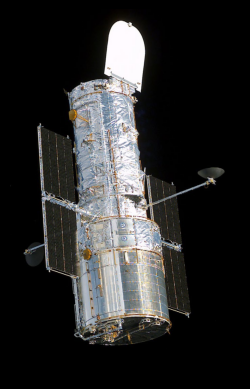

In [14]:
img = plt.imread(documents[1].metadata['images'][0]['path']) # Displaying a image from a Document .
plt.imshow(img)
plt.axis("off")